## Terceira Lista de Exercícios - OTIMIZACAO NAO LINEAR
**Nome: $\color{red}{\text{Antonio Carlos da Anunciação}}$**

**Matricula: 2018019443**

**Professor: Frederico Gadelha**

**Chapter 5: Read Sections 5.1 a 5.9**


---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Problem 5.1
Find the minimum of the function
$$f(x) = 0.65-\frac{0.75}{1+x^2}-0.65x{tan}^{-1}\frac{1}{x}$$
using the following methods:

In [2]:
def f(x):
    f = 0.65-(0.75/(1+x**2))-0.65*x*np.arctan(1/x)
    return (f)
a = np.arange(0, 5, 0.1)

(a) Unrestricted search with a fixed step size of 0.1 from the starting point 0.0

In [3]:
def US(start, step, maxepoch, function, maxmim = None):
    if maxmim == 'maximo':
        modo = -1        
    else:
        modo = 1
        
    if start == 0:
        start = 1/(10**100)
    
    epoch = 0    
    while (modo*function(start) > modo*function(start+step)) or epoch == maxepoch:
        start = start + step
        y = modo*function(start)
        epoch = epoch + 1

    return(start, function(start))

In [4]:
xmin, fmin = US(0, 0.1, 100, f)

Valor minimo de x: 0.5000 com f(x*) =  -0.3098


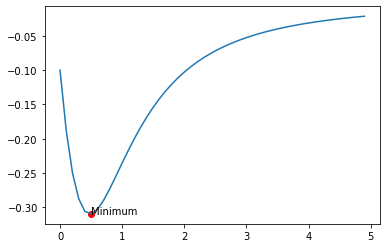

In [5]:
print("Valor minimo de x:", '{:.4f}'.format(xmin), "com f(x*) = ", '{:.4f}'.format(fmin))
plt.plot(a,f(a))
plt.scatter([xmin], [fmin], color='red')
plt.annotate("Minimum", (xmin, fmin))
plt.show()

(b) Unrestricted search with an accelerated step size using an initial step size of 0.1 and starting point of 0.0

In [6]:
def USA(start, step, maxepoch, function, maxmim = None):
    if maxmim == 'maximo':
        modo = -1
    else:
        modo = 1
        
    if start == 0:
        start = 1/(10**100)
        
    i, epoch = 0, 0
    x = np.array([start])
    y = np.array([modo*function(x[i])])

    while True:
        xi = x[i]+step*2**i
        x = np.vstack((x, xi))
        yi = modo*function(xi)
        y = np.vstack((y, yi))
        i, epoch = i+1, epoch+1

        if( ( modo*function(x[i]) > modo*function(x[i-1]) ) or epoch == maxepoch ):
            break

    return ((x[-1]+x[-3])/2, function((x[-1]+x[-3])/2))
    

In [7]:
xmin, fmin = USA(0, 0.1, 100, f)

Valor minimo de x: [0.9] com f(x*) =  [-0.25458366]


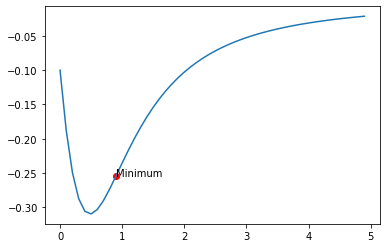

In [8]:
print("Valor minimo de x:", xmin, "com f(x*) = ", fmin)
plt.plot(a,f(a))
plt.scatter([xmin], [fmin], color='red')
plt.annotate("Minimum", (xmin, fmin))
plt.show()

(c) Exhaustive search method in the interval (0, 3) to achieve an accuracy of within 5% of the exact value

In [9]:
def ESM(alpha, start, end, function, maxmim = None):
    if maxmim == 'maximo':
        modo = -1
    else:
        modo = 1
    
    n = 1/alpha + 1
    x = np.arange(0,3,1/n)
    y = function(x)
    
    for i in range(0,len(y)-1):
        if (modo*function(x[i]) < modo*function(x[i+1])):
            xf, ff = (x[i] + x[i+1])/2, function((x[i] + x[i+1])/2)
            break
            
    return (xf, ff)

In [10]:
xmin, fmin = ESM(0.05, 0, 3, f)

Valor minimo de x: 0.49999999999999994 com f(x*) =  -0.30982333328307937


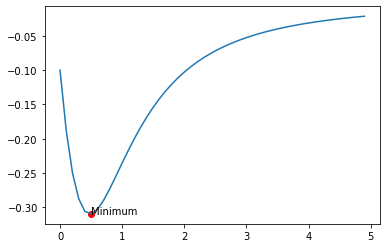

In [11]:
print("Valor minimo de x:", xmin, "com f(x*) = ", fmin)
plt.plot(a,f(a))
plt.scatter([xmin], [fmin], color='red')
plt.annotate("Minimum", (xmin, fmin))
plt.show()

(d) Dichotomous search method in the interval (0, 3) to achieve an accuracy of within 5% of the exact value using a value of δ = 0.0001

In [12]:
def DSM(start, end, delta, alpha, function, maxmim = None):
    if maxmim == 'maximo':
        modo = -1
    else:
        modo = 1
        
    n = int((end-delta)/(2*alpha*end-delta))
    n = n if ((n % 2) == 0) else n + 1
    
    x_a, x_b  = end/2 - delta/2, end/2 + delta/2
    f_a, f_b = modo*function(x_a), modo*function(x_b)
    i = 0
    while i < n:
        if(f_a > f_b):
            start = x_a
            x_a, x_b  = (x_a + (end - x_a)/2) - delta/2, (x_a + (end - x_a)/2) + delta/2
            f_a, f_b = modo*function(x_a), modo*function(x_b)
            xf, ff = (start + x_b)/2, function((start + x_b)/2)
            
        else:
            end = x_b
            x_a, x_b  = (x_b - (x_b - start)/2) - delta/2, (x_b - (x_b - start)/2) + delta/2
            f_a, f_b = modo*function(x_a), modo*function(x_b)
            xf, ff = (x_a + end)/2, function((x_a + end)/2)
        i = i+1
        
    return (xf, ff)    

In [13]:
xmin, fmin = DSM(0, 3, 0.001, 0.05, f)

Valor minimo de x*: 0.48300512695312486 com f(x*) =  -0.3100179800405343


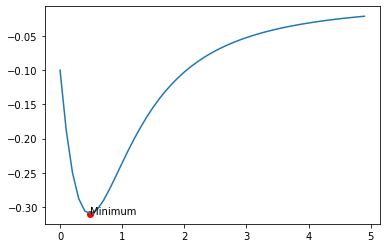

In [14]:
print("Valor minimo de x*:", xmin, "com f(x*) = ", fmin)
plt.plot(a,f(a))
plt.scatter([xmin], [fmin], color='red')
plt.annotate("Minimum", (xmin, fmin))
plt.show()

(e) Interval halving method in the interval (0, 3) to achieve an accuracy of within 5% of the exact value

In [15]:
def IHM(start, end, alpha, function, maxmim = None):
    if maxmim == 'maximo':
        modo = -1
    else:
        modo = 1
        
    L = abs(start - end)
    
    while (L > alpha):
        x1, x0, x2 = L/4+start, L/2+start, end-L/4
        f1, f0, f2 = modo*function(x1), modo*function(x0), modo*function(x2)

        if f2 > f0 and f0 > f1:
            end = x0 
        elif f1 > f0 and f0 > f2:
             start = x0 
        else:
            start, end = x1, x2

        L = abs(start - end)
    
    return ((start+end)/2, function((start+end)/2))
        

In [16]:
xmin, fmin = IHM(0, 3, 0.05, f)

Valor minimo de x*: 0.4921875 com f(x*) =  -0.3099507670160526


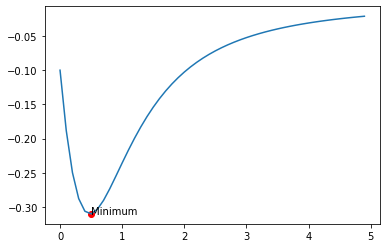

In [17]:
print("Valor minimo de x*:", xmin, "com f(x*) = ", fmin)
plt.plot(a,f(a))
plt.scatter([xmin], [fmin], color='red')
plt.annotate("Minimum", (xmin, fmin))
plt.show()

---

#### Problem 5.4:
Plot the graph of the function f (x) given in Problem 5.1 in the range (0, 3) and identify
its minimum.

**Derivada de f(x):**

In [18]:
def df(x):
    df = (1.5*x)/((1+x**2)**2)-0.65*(np.arctan(1/x)-x/(x**2+1))
    return (df)

**Função para achar o valor proximo a raiz:**

In [19]:
def findNearest(X, r):
    X = np.asarray(X)
    idx = (np.abs(X - r)).argmin()
    return X[idx]

In [20]:
x = np.arange(0,3,1/1000)
zero = np.zeros(x.shape)
raiz = findNearest(df(x), 0)
index = np.where(df(x)==raiz)

Valor minimo de x*: 0.4810 com f(x*) =  -0.3100


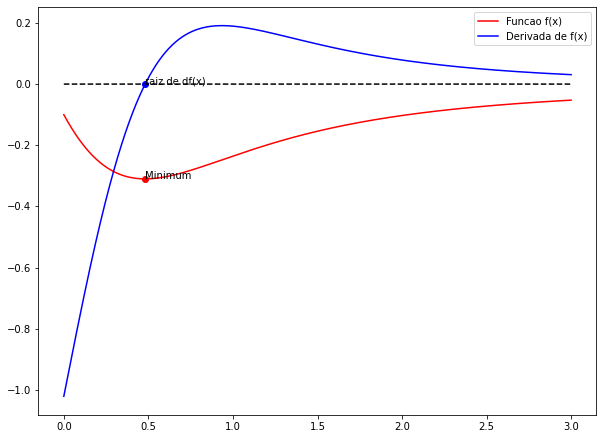

In [21]:
print("Valor minimo de x*:", '{:.4f}'.format(x[np.argmin(f(x))]), "com f(x*) = ", '{:.4f}'.format(f(x[np.argmin(f(x))])))

plt.figure(figsize=(10,7.5))

plt.plot(x,zero, '--k')
plt.plot(x,f(x), 'r', label="Funcao f(x)")
plt.plot(x,df(x), 'b', label="Derivada de f(x)")

plt.scatter(x[np.argmin(f(x))], [f(x[np.argmin(f(x))])], color='red')
plt.annotate("Minimum", (x[np.argmin(f(x))], f(x[np.argmin(f(x))])))

plt.scatter(x[index], [df(x[index])], color='blue')
plt.annotate("raiz de df(x)", (x[index], df(x[index])))
plt.legend()
plt.show()

---

#### Problem 5.7
Find the maximum of the function given by Eq. (4) in Problem 5.5 using the following
methods:
$$g(\lambda) = {\frac{0.5}{\sqrt{1+\lambda^2}}-\sqrt{1+\lambda^2}\left(1-\frac{0.5}{1+\lambda^2}\right)+\lambda}\quad \textrm{eq. (4)}$$

In [22]:
def g(x):
    g = 0.5/np.sqrt(1+x**2)-(np.sqrt(1+x**2))*(1-0.5/(1+x**2))+x
    return g
b = np.arange(0, 5, 0.1)

Valor maximo x*: 0.8000 com f(x*) =  -0.2758


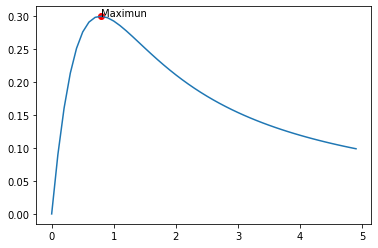

In [23]:
print("Valor maximo x*:", '{:.4f}'.format(b[np.argmax(g(b))]), "com f(x*) = ", '{:.4f}'.format(f(x[np.argmax(g(x))])))
plt.plot(b,g(b))
plt.scatter(b[np.argmax(g(b))], [g(b[np.argmax(g(b))])], color='red')
plt.annotate("Maximun", (b[np.argmax(g(b))], g(b[np.argmax(g(b))])))
plt.show()

(a) Unrestricted search with a fixed step size of 0.1 from the starting point 0.0

In [24]:
xmax, fmax = US(0, 0.1, 100, g, 'maximo')

Valor maximo x*: 0.8000 com f(x*) =  0.3002


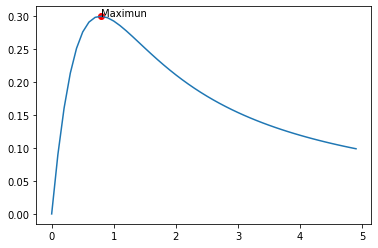

In [25]:
print("Valor maximo x*:", '{:.4f}'.format(xmax), "com f(x*) = ", '{:.4f}'.format(fmax))
plt.plot(b,g(b))
plt.scatter([xmax], [fmax], color='red')
plt.annotate("Maximun", (xmax, fmax))
plt.show()

(b) Unrestricted search with an accelerated step size using an initial step length of 0.1 and a starting point of 0.0

In [26]:
xmax, fmax = USA(0, 0.1, 100, g, 'maximo')

Valor maximo x*: [0.9] com f(x*) =  [0.29793174]


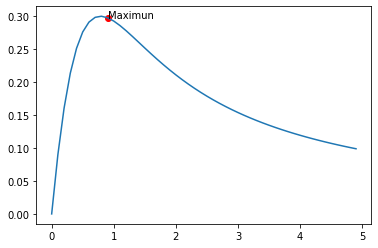

In [27]:
print("Valor maximo x*:", xmax, "com f(x*) = ", fmax)
plt.plot(b,g(b))
plt.scatter([xmax], [fmax], color='red')
plt.annotate("Maximun", (xmax, fmax))
plt.show()

(c) Exhaustive search method in the interval (0, 3) to achieve an accuracy of within 5% of the exact value

In [28]:
xmax, fmax = ESM(0.05, 0, 3, g, 'maximo')

Valor maximo x*: 0.8333333333333333 com f(x*) =  0.29984633361293356


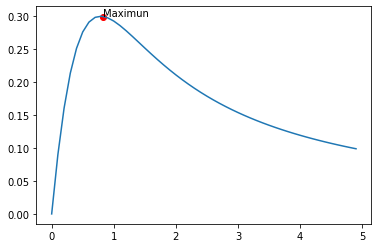

In [29]:
print("Valor maximo x*:", xmax, "com f(x*) = ", fmax)
plt.plot(b,g(b))
plt.scatter([xmax], [fmax], color='red')
plt.annotate("Maximun", (xmax, fmax))
plt.show()

(d) Dichotomous search method in the interval (0, 3) to achieve an accuracy of within 5% of the exact value using a value of δ = 0.0001

In [30]:
xmax, fmax = DSM(0, 3, 0.001, 0.05, g, 'maximo')

Valor maximo x*: 0.787591064453125 com f(x*) =  0.3002826766711381


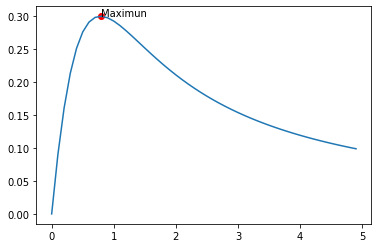

In [31]:
print("Valor maximo x*:", xmax, "com f(x*) = ", fmax)
plt.plot(b,g(b))
plt.scatter([xmax], [fmax], color='red')
plt.annotate("Maximun", (xmax, fmax))
plt.show()

(e) Interval halving method in the interval (0, 3) to achieve an accuracy of within 5% of the exact value

In [32]:
xmax, fmax = IHM(0, 3, 0.05, g, 'maximo')

Valor maximo x*: 0.796875 com f(x*) =  0.3002595475331215


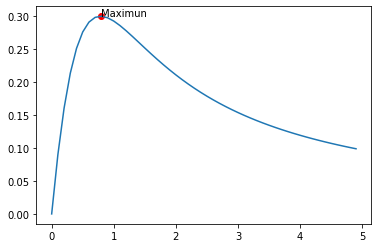

In [33]:
print("Valor maximo x*:", xmax, "com f(x*) = ", fmax)
plt.plot(b,g(b))
plt.scatter([xmax], [fmax], color='red')
plt.annotate("Maximun", (xmax, fmax))
plt.show()

---

#### Problem 5.8
Find the maximum of the function given by Eq. (4) in Problem 5.5 using the following methods:

(a) Fibonacci method with n = 8

In [34]:
def Fibonacci(n):
    if n==1 or n==0:
        return 1
    else:
        return Fibonacci(n-1)+Fibonacci(n-2)

In [35]:
def FiboMethod(n, A, B, function, mode = None):
    if mode == 'maximo':
        modo = -1
    else:
        modo = 1
    j = 2
    while (j < n+1):
        L1 = B-A
        L2 = Fibonacci(n-2)/Fibonacci(n)*L1

        if L2 > L1/2:
            x1, x2 = B-L2, A+L2
        else:
            x1, x2 = A+L2, B-L2

        f1, f2 = modo*function(x1), modo*function(x2)

        if f2 < f1:
            A = x1
            L2 = Fibonacci(n-j)*L1/Fibonacci(n-(j-2))
            j = j+1
        elif f2 > f1:
            B = x2
            L2 = Fibonacci(n-j)*L1/Fibonacci(n-(j-2))
            j = j+1
        else:
            A, B = x1, x2
            L2 = Fibonacci(n-j)*(A-B)/Fibonacci(n-(j-2))
            j = j+2
            
    xmax, fmax = (A+B)/2, g((A+B)/2)
    return xmax, fmax 


In [36]:
c = np.arange(0,3,1/100)
xmax, fmax = FiboMethod(8, 0, 3, g, 'maximo')

Valor maximo x*: 0.7590676317522447 com f(x*) =  0.3001259176232144


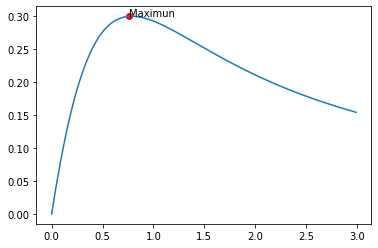

In [37]:
print("Valor maximo x*:", xmax, "com f(x*) = ", fmax)
plt.plot(c,g(c))
plt.scatter([xmax], [fmax], color='red')
plt.annotate("Maximun", (xmax, fmax))
plt.show()

(b) Golden section method with n = 8

In [38]:
def gamma(tol):
    n, erro = 1, 1/tol
    while (erro > tol):
        gammaN_1 = Fibonacci(n)/Fibonacci(n-1)
        gammaN_2 = Fibonacci(n+1)/Fibonacci(n)
        n = n+1
        erro = abs(gammaN_1 - gammaN_2)
        
    return gammaN_1

def GoldenMethod(gamma, n, A, B, function, mode = None):
    if mode == 'maximo':
        modo = -1
    else:
        modo = 1
    j = 2
    while (j < n+1):
        L1 = B-A
        L2 = ((1/gamma)**2)*L1

        if L2 > L1/2:
            x1, x2 = B-L2, A+L2
        else:
            x1, x2 = A+L2, B-L2

        f1, f2 = modo*function(x1), modo*function(x2)

        if f2 < f1:
            A = x1
            L2 = ((1/gamma)**2)*(B-A)
            j = j+1
        elif f2 > f1:
            B = x2
            L2 = ((1/gamma)**2)*(B-A)
            j = j+1
        else:
            A, B = x1, x2
            L2 = ((1/gamma)**2)*(B-A)
            j = j+2
    
    return ((A+B)/2,function((A+B)/2))

In [39]:
gam = gamma(10**(-10))
xmax, fmax = GoldenMethod(gam, 8, 0, 3, g, 'maximo')

Valor maximo x*: 0.7598667131519126 com f(x*) =  0.30013519715574866


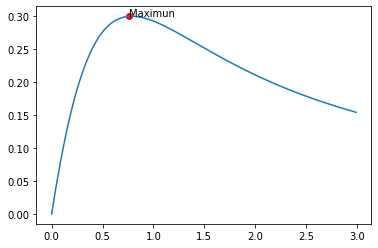

In [40]:
print("Valor maximo x*:", xmax, "com f(x*) = ", fmax)
plt.plot(c,g(c))
plt.scatter([xmax], [fmax], color='red')
plt.annotate("Maximun", (xmax, fmax))
plt.show()

---

#### Problem 5.26
Write a computer program, in the form of a subroutine, to implement the Fibonacci method.

**Flowchart for implementing Fibonacci search method.**

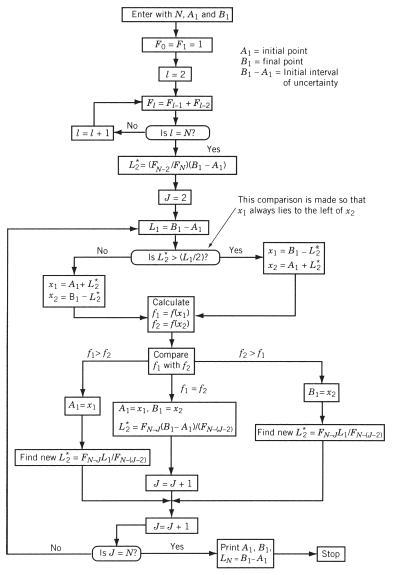

**Implementation of method to maxmin problems.**

In [41]:
def Fibonacci_Method(n, A, B, function, mode = None):
    if mode == 'maximo':
        modo = -1
    else:
        modo = 1
    j = 2
    while (j < n+1):
        L1 = B-A
        L2 = Fibonacci(n-2)/Fibonacci(n)*L1

        if L2 > L1/2:
            x1, x2 = B-L2, A+L2
        else:
            x1, x2 = A+L2, B-L2

        f1, f2 = modo*function(x1), modo*function(x2)

        if f2 < f1:
            A = x1
            L2 = Fibonacci(n-j)*L1/Fibonacci(n-(j-2))
            j = j+1
        elif f2 > f1:
            B = x2
            L2 = Fibonacci(n-j)*L1/Fibonacci(n-(j-2))
            j = j+1
        else:
            A, B = x1, x2
            L2 = Fibonacci(n-j)*(A-B)/Fibonacci(n-(j-2))
            j = j+2
    
    return (A, B, (B-A))

---

#### Problem 5.27
Write a computer program, in the form of a subroutine, to implement the golden section method.

$\textrm{First we need define }{\gamma}\textrm{ value:}$
$${ \gamma=\lim_{n \to \infty} \frac{F(n)}{F(n-1)}}$$
$\textrm{Where F(n) is Fibonacci number to n.}$

In [42]:
def gamma(tol):
    n, erro = 1, 1/tol
    while (erro > tol):
        gammaN_1 = Fibonacci(n)/Fibonacci(n-1)
        gammaN_2 = Fibonacci(n+1)/Fibonacci(n)
        n = n+1
        erro = abs(gammaN_1 - gammaN_2)
        
    return gammaN_1

In [43]:
def Golden_Method(gamma, n, A, B, function, mode = None):
    if mode == 'maximo':
        modo = -1
    else:
        modo = 1
    j = 2
    while (j < n+1):
        L1 = B-A
        L2 = ((1/gamma)**2)*L1

        if L2 > L1/2:
            x1, x2 = B-L2, A+L2
        else:
            x1, x2 = A+L2, B-L2

        f1, f2 = modo*function(x1), modo*function(x2)

        if f2 < f1:
            A = x1
            L2 = ((1/gamma)**2)*(B-A)
            j = j+1
        elif f2 > f1:
            B = x2
            L2 = ((1/gamma)**2)*(B-A)
            j = j+1
        else:
            A, B = x1, x2
            L2 = ((1/gamma)**2)*(B-A)
            j = j+2
    
    return (A, B, (B-A))

---
### References:
#### 1. Engineering Optimization Theory and Practice, 4th, Singiresu S. Rao
---